# Package Importing Zone

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import regex as re

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

import sklearn
import nltk
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
from nltk.tokenize import PunktSentenceTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import random

from tqdm import tqdm

# File Importing Zone

In [3]:
#Importing five review files
df1 = pd.read_csv("/Users/Jadhav/Desktop/SIP Project/data/df1.csv")
df2 = pd.read_csv("/Users/Jadhav/Desktop/SIP Project/data/df2.csv")
df3 = pd.read_csv("/Users/Jadhav/Desktop/SIP Project/data/df3.csv")
df4 = pd.read_csv("/Users/Jadhav/Desktop/SIP Project/data/df4.csv")
df5 = pd.read_csv("/Users/Jadhav/Desktop/SIP Project/data/df5.csv")

# Creating One Master DataFrame

In [4]:
frames_list = [df1,df2,df3,df4,df5]
df = pd.concat(frames_list)

In [5]:
# Saving the combined df in csv file
# df.to_csv("/Users/Jadhav/Desktop/SIP Project/data/df.csv")

# Basic EDA

## Checking First & Last Rows

In [6]:
#First rows are 1 Star Reviews
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,472b3be7-bd4f-43bc-b615-46d048c15e01,Tanya Pathak,https://play-lh.googleusercontent.com/a-/AD5-W...,The explanation is very nice through animation...,1,39,10.13.0.15142,2022-12-11 11:22:32,NaN,NaN
1,1,7fd8bcf0-296b-4db5-84dd-2ef67e65f242,Soumyadeep Podder,https://play-lh.googleusercontent.com/a-/AD5-W...,Third class app.The only problem is that I get...,1,4095,10.9.2.14517,2022-10-06 20:53:10,We regret that our team reached out to you mul...,2022-10-07 15:00:55
2,2,adcd1cb8-1ff4-4e34-b1a7-0ff1923cf733,ASHUTOSH KUMAR SINGH,https://play-lh.googleusercontent.com/a-/AD5-W...,Third class app. The only problem is that get ...,1,329,7.5.1.9945,2022-11-19 19:35:14,\n\nWe regret that our team reached out to you...,2022-11-22 11:41:26
3,3,90a9ad95-b225-4321-9e30-97c52577f764,Disha Sharma,https://play-lh.googleusercontent.com/a-/AD5-W...,The new update is causing lot of problems in r...,1,6934,10.4.0.13552,2022-06-26 17:39:08,Apologies for the inconvenience. Please drop u...,2022-06-28 14:41:02
4,4,bfec2bc9-b97a-44a0-9530-245fe2673857,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I am largely dissapointed by the quality of vi...,1,587,5.6.0.7484,2020-04-03 20:32:43,Thank you for your feedback. We recommend rein...,2020-04-06 22:57:32


In [7]:
#Last rows are 5 Star Reviews
df.tail()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
157802,157802,1ffbe5d2-b6f6-4587-8e45-444e257928c7,Yogesh Kumawat,https://play-lh.googleusercontent.com/a/AEdFTp...,MONIKA kumawat,5,0,6.1.2.8367,2020-07-25 12:46:52,NaN,NaN
157803,157803,332c8ef1-f3a2-4a92-9b20-1e7fe426c452,Pavan_Kumar _,https://play-lh.googleusercontent.com/a-/AD5-W...,super explaination,5,0,6.1.2.8367,2020-07-31 18:00:05,"""Thank you very much :). We are glad to be a p...",2020-08-03 18:09:49
157804,157804,8aef3ebf-e47c-47e8-bef4-a3da8a2c083a,Zahid Pahlavi,https://play-lh.googleusercontent.com/a-/AD5-W...,Nise app,5,0,6.1.2.8367,2020-07-14 11:52:48,Thank you so much for reviewing our app:). Kee...,2020-07-17 10:56:31
157805,157805,45a7d8de-adde-4891-879a-62ec1af74929,ayush malode,https://play-lh.googleusercontent.com/a-/AD5-W...,Exce Lent,5,0,6.1.2.8367,2020-07-30 07:46:24,NaN,NaN
157806,157806,dd39ece2-0271-46e8-9887-2d63a99342a0,Mandeep,https://play-lh.googleusercontent.com/a/AEdFTp...,Bahattren app,5,0,6.1.2.8367,2020-07-29 13:05:51,NaN,NaN


## Checking Shape of df

In [8]:
df.shape

(289182, 11)

In [9]:
df.describe()

,Unnamed: 0,score,thumbsUpCount
count,289182.000000,289182.000000,289182.000000
mean,52918.967571,3.847549,2.170851
std,45263.633783,1.553659,63.622098
min,0.000000,1.000000,0.000000
25%,15630.250000,3.000000,0.000000
50%,38409.000000,5.000000,0.000000
75%,85510.750000,5.000000,0.000000
max,157806.000000,5.000000,10783.000000


<b>We have total 2,89,182 Reviews

In [10]:
df.groupby('score').count()['reviewId']

score
1     54253
2      9772
3     19590
4     47760
5    157807
Name: reviewId, dtype: int64

<AxesSubplot:xlabel='score'>

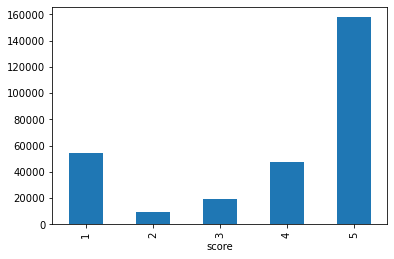

In [11]:
df.groupby('score').count()['reviewId'].plot(kind='bar')

<b> Above figure shows that we have very high number of 5 star reviews

# Checking total number of users who commented

In [12]:
# Creating a list of all users
users = list(df['userName'].unique())
users.sort()

In [13]:
# Number of users
len(users)

130526

<b> We have total 1,30,526 unique users

# Checking if there is a user named Byjus

In [14]:
r = re.compile(r'Byju')

In [15]:
newlist = list(filter(r.match, users))

In [16]:
newlist

['Byju,s Learning', 'Byjus Abi', 'Byjus royal K-11']

<b> There are 3 names with name Byju's and they seem fakeIds

# Data Cleaning

## Dropping Unnecessary Columns

<b> We don't need following colums for our analysis</b>
1. Unnamed
2. reviewId
3. userImage	

In [17]:
df_cols_dopped = df.drop(['Unnamed: 0','reviewId','userImage'], axis=1)

* 
* 


## Dealing with NAs

In [18]:
df_cols_dopped['content'].isna().sum()

22

<b> There are 22 Na reviews.  
    Let's Remove them

In [19]:
#Displaying those 22 NaN entries
df_cols_dopped[df_cols_dopped['content'].isnull() ]

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
38849,A Google user,NaN,1,0,1.6.1.0,2016-07-24 14:19:35,NaN,NaN
54247,A Google user,NaN,1,0,NaN,2016-05-03 17:14:40,NaN,NaN
54248,A Google user,NaN,1,0,NaN,2016-04-12 16:44:50,NaN,NaN
54249,A Google user,NaN,1,0,NaN,2017-03-08 19:48:39,NaN,NaN
54250,A Google user,NaN,1,0,NaN,2015-08-19 19:11:20,NaN,NaN
54251,A Google user,NaN,1,0,NaN,2017-05-30 16:41:44,NaN,NaN
54252,A Google user,NaN,1,0,NaN,2015-09-02 13:30:28,NaN,NaN
13619,A Google user,NaN,3,0,3.3.1.2552,2016-07-24 10:52:39,NaN,NaN
19585,A Google user,NaN,3,0,NaN,2016-06-05 12:21:24,NaN,NaN
19586,A Google user,NaN,3,0,NaN,2016-06-27 17:55:14,NaN,NaN


In [20]:
# Removing these 22 entries 
df_na_rm = df_cols_dopped[~df_cols_dopped['content'].isnull() ]
df_na_rm['content'].isna().sum()

0

## Checking Data Types

In [21]:
df_na_rm.dtypes

userName                object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
dtype: object

## Converting all the colums in proper data types
1. userName  :               str
2. content  :                str
3. reviewCreatedVersion :    str
4. at        :               datetime
5. replyContent     :        str
6. repliedAt      :          str


In [22]:
df_na_rm['userName'] = df_na_rm['userName'].astype('string')
df_na_rm['content'] = df_na_rm['content'].astype('string').copy()
df_na_rm['reviewCreatedVersion'] = df_na_rm['reviewCreatedVersion'].astype('string').copy()
df_na_rm['replyContent'] = df_na_rm['replyContent'].astype('string').copy()

<ipython-input-22-c66075fb67a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_rm['userName'] = df_na_rm['userName'].astype('string')
<ipython-input-22-c66075fb67a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_rm['content'] = df_na_rm['content'].astype('string').copy()
<ipython-input-22-c66075fb67a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [23]:
df_na_rm.dtypes

userName                string
content                 string
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    string
at                      object
replyContent            string
repliedAt               object
dtype: object

## Date Time Conversions

In [24]:
df_na_rm['at'] = df_na_rm['at'].astype('datetime64[ns]').copy()
df_na_rm['repliedAt'] = df_na_rm['repliedAt'].astype('datetime64[ns]').copy()

<ipython-input-24-7c6b603db5e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_rm['at'] = df_na_rm['at'].astype('datetime64[ns]').copy()
<ipython-input-24-7c6b603db5e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_rm['repliedAt'] = df_na_rm['repliedAt'].astype('datetime64[ns]').copy()


In [25]:
df_na_rm.dtypes

userName                        string
content                         string
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            string
at                      datetime64[ns]
replyContent                    string
repliedAt               datetime64[ns]
dtype: object

In [26]:
#Final Data Type Corrected DataFrame
df_dtype = df_na_rm

## Sorting By Score And Thumbsup Count
<b> We are sorting so that : </b>
1. 1 Star reviews are at top and 5 star reviews are at bottom
2. Among each category of score, reviews with most thumbsups should be at top

In [27]:
df_sorted = df_dtype.sort_values(by=['score','thumbsUpCount'],\
                                 ascending=[True,False],\
                                 ignore_index=True)
df_sorted.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Disha Sharma,The new update is causing lot of problems in r...,1,6934,10.4.0.13552,2022-06-26 17:39:08,Apologies for the inconvenience. Please drop u...,2022-06-28 14:41:02
1,#LifeonPassion,This app was amazing until I used the free ver...,1,5526,8.2.0.10847,2021-05-27 22:11:29,We are extremely sorry that you had an unpleas...,2021-06-03 20:45:10
2,A Google user,The staffs keep calling and pestering you once...,1,4566,5.3.1.6752,2019-05-21 11:15:05,<NA>,NaT
3,A Google user,I am totally not satisfied with this app.I log...,1,4140,5.4.3.6941,2019-08-01 20:04:00,<NA>,NaT
4,Soumyadeep Podder,Third class app.The only problem is that I get...,1,4095,10.9.2.14517,2022-10-06 20:53:10,We regret that our team reached out to you mul...,2022-10-07 15:00:55


In [28]:
#Final cleaned df
df_clean = df_sorted

# Feature Engineering

In [29]:
df_clean['review_len'] = df_clean['content'].apply(len)

In [30]:
df_clean.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review_len
0,Disha Sharma,The new update is causing lot of problems in r...,1,6934,10.4.0.13552,2022-06-26 17:39:08,Apologies for the inconvenience. Please drop u...,2022-06-28 14:41:02,499
1,#LifeonPassion,This app was amazing until I used the free ver...,1,5526,8.2.0.10847,2021-05-27 22:11:29,We are extremely sorry that you had an unpleas...,2021-06-03 20:45:10,496
2,A Google user,The staffs keep calling and pestering you once...,1,4566,5.3.1.6752,2019-05-21 11:15:05,<NA>,NaT,441
3,A Google user,I am totally not satisfied with this app.I log...,1,4140,5.4.3.6941,2019-08-01 20:04:00,<NA>,NaT,458
4,Soumyadeep Podder,Third class app.The only problem is that I get...,1,4095,10.9.2.14517,2022-10-06 20:53:10,We regret that our team reached out to you mul...,2022-10-07 15:00:55,399


## More EDA

array([[<AxesSubplot:title={'center':'review_len'}>]], dtype=object)

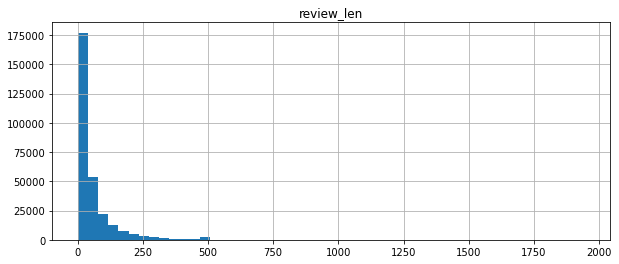

In [31]:
#Seeing frequency distribution of reviw legths
df_clean.hist(column='review_len',  bins = 50, figsize=(10,4))

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>, <AxesSubplot:>]], dtype=object)

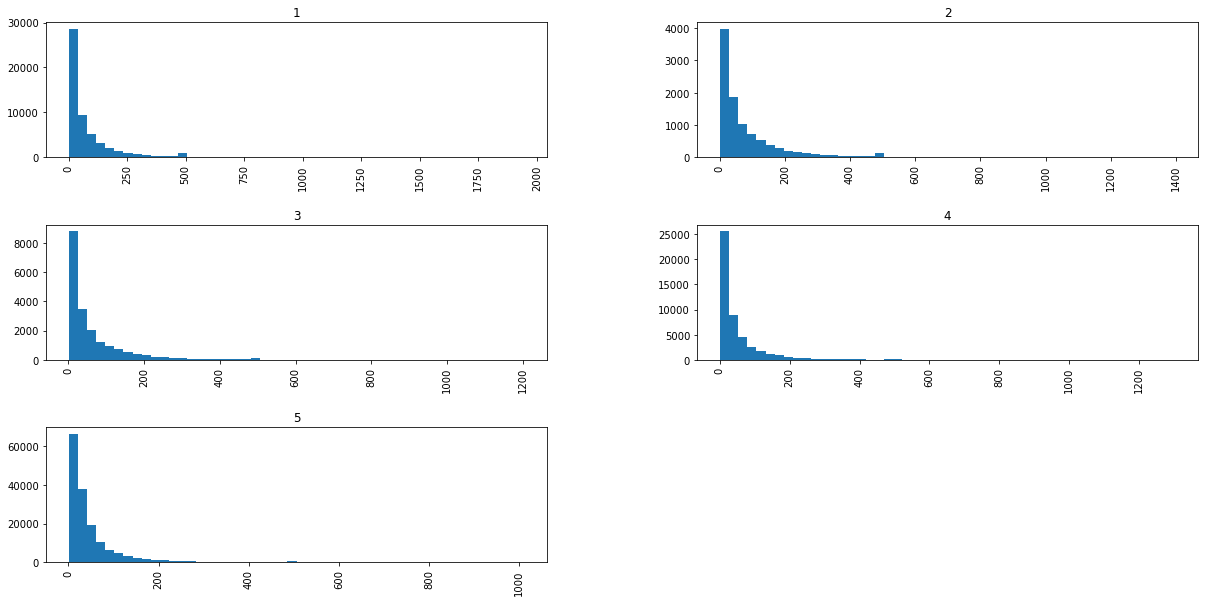

In [32]:
#Seeing frequency distribution of five scores
df_clean.hist(column='review_len', by='score', bins = 50, figsize=(20,10))

In [33]:
print("The maximum number of characters in review legths are {a} and \nminimum number of characters in review lengths are {b}".\
      format(a= df_clean['review_len'].max(),\
             b= df_clean['review_len'].min()))

The maximum number of characters in review legths are 1946 and 
minimum number of characters in review lengths are 1


## Checking connection between review lengths and number of thumbsup

<AxesSubplot:xlabel='review_len', ylabel='thumbsUpCount'>

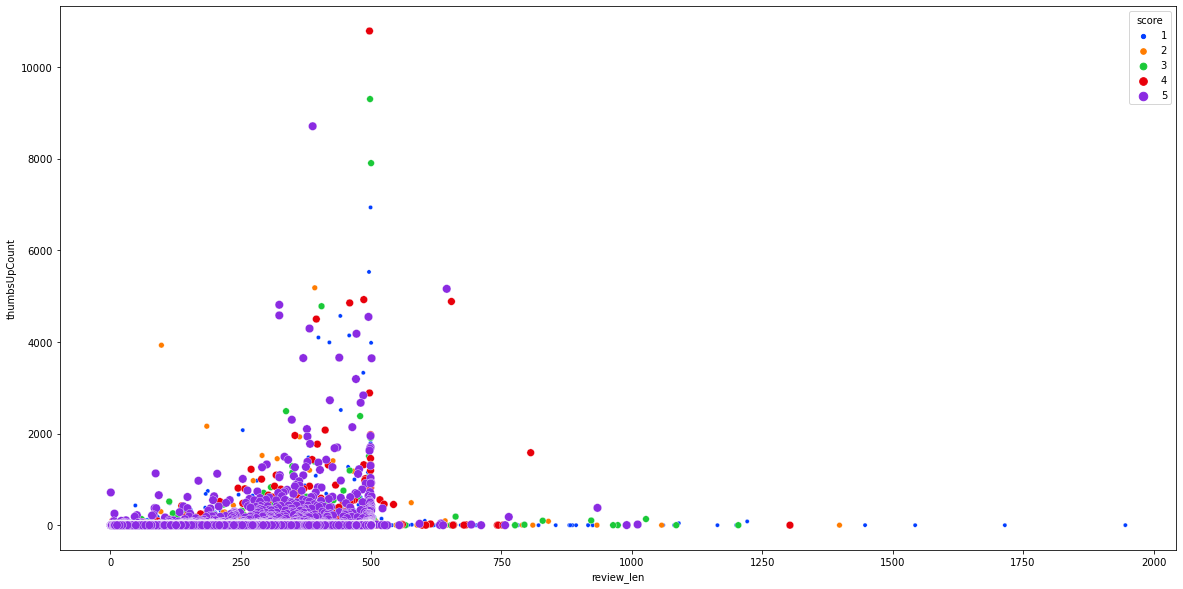

In [34]:
plt.figure(figsize=(20,10))
sns.scatterplot(data= df_clean, x='review_len', y='thumbsUpCount',\
                hue='score', size='score', style=None, palette='bright', \
                sizes=None,  \
                )

<b> Above diagram shows that the reviews that get more thumbsups are of lenngth 300 to 500
    

# Natural Laguage Processing

## 1. Setiment Analysis Using VADER Model

In [35]:
#Creating a class
sia = SentimentIntensityAnalyzer()

In [36]:
#Let's try running our SIA on first review
df_clean['content'][0]

"The new update is causing lot of problems in re-watching a video from half as it plays from the beginning only. The new interface is not very good as before. The sound quality breaks many times which is annoying. I've to keep tapping on the screen to make voice smoother. Also, once a video gets over, after attempting all mcqs, it doesn't move ahead to the next journey. A plain white screen appears and it just hangs there. I really hope these bugs get resolved quick before my exam takes my life."

In [37]:
sia.polarity_scores(df_clean['content'][0])

{'neg': 0.083, 'neu': 0.846, 'pos': 0.071, 'compound': -0.28}

<b> neg score is greater than pos score.  
    Also compound in negative. 
    Therefore this is a negative review

In [38]:
#Introducing a simple ID
df_clean['id'] = range(1, len(df_clean) + 1)

In [39]:
list(df_clean.columns.values)

['userName',
 'content',
 'score',
 'thumbsUpCount',
 'reviewCreatedVersion',
 'at',
 'replyContent',
 'repliedAt',
 'review_len',
 'id']

In [40]:
#Changing order
dff = df_clean[['id','userName',\
 'content',\
 'score',\
 'thumbsUpCount',\
 'reviewCreatedVersion',\
 'at',\
 'replyContent',\
 'repliedAt',\
 'review_len']]

dff.head()

,id,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review_len
0,1,Disha Sharma,The new update is causing lot of problems in r...,1,6934,10.4.0.13552,2022-06-26 17:39:08,Apologies for the inconvenience. Please drop u...,2022-06-28 14:41:02,499
1,2,#LifeonPassion,This app was amazing until I used the free ver...,1,5526,8.2.0.10847,2021-05-27 22:11:29,We are extremely sorry that you had an unpleas...,2021-06-03 20:45:10,496
2,3,A Google user,The staffs keep calling and pestering you once...,1,4566,5.3.1.6752,2019-05-21 11:15:05,<NA>,NaT,441
3,4,A Google user,I am totally not satisfied with this app.I log...,1,4140,5.4.3.6941,2019-08-01 20:04:00,<NA>,NaT,458
4,5,Soumyadeep Podder,Third class app.The only problem is that I get...,1,4095,10.9.2.14517,2022-10-06 20:53:10,We regret that our team reached out to you mul...,2022-10-07 15:00:55,399


In [41]:
# Creating a dictioary to create a df

res = {}

for i, row in tqdm(dff.iterrows(), total=len(dff)):
    text = row['content']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 289160/289160 [01:38<00:00, 2935.91it/s]


In [42]:
#Connvertinng the dictionary into dataframe
vaders = pd.DataFrame(res)
vaders.head()

,1,2,3,4,5,6,7,8,9,10,...,289151,289152,289153,289154,289155,289156,289157,289158,289159,289160
neg,0.083,0.0960,0.1050,0.0980,0.1690,0.0510,0.0610,0.1000,0.0610,0.1930,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
neu,0.846,0.6940,0.7940,0.8240,0.7840,0.8420,0.8410,0.8380,0.8110,0.8070,...,0.2040,1.0,0.2950,1.0,1.0,1.0,0.2040,1.0,1.0,1.0
pos,0.071,0.2100,0.1010,0.0790,0.0460,0.1070,0.0980,0.0620,0.1280,0.0000,...,0.7960,0.0,0.7050,0.0,0.0,0.0,0.7960,0.0,0.0,0.0
compound,-0.280,0.8671,-0.0813,-0.5428,-0.8943,0.5574,0.3301,-0.6867,0.7876,-0.8887,...,0.5994,0.0,0.3384,0.0,0.0,0.0,0.5994,0.0,0.0,0.0


In [43]:
#We need to traspose the df
vaders = vaders.T
vaders.head()

,neg,neu,pos,compound
1,0.083,0.846,0.071,-0.2800
2,0.096,0.694,0.210,0.8671
3,0.105,0.794,0.101,-0.0813
4,0.098,0.824,0.079,-0.5428
5,0.169,0.784,0.046,-0.8943


### Introducig a column to use for merging with original df

In [44]:
vaders = vaders.reset_index().rename(columns = {'index':'id'})
vaders.head()

,id,neg,neu,pos,compound
0,1,0.083,0.846,0.071,-0.2800
1,2,0.096,0.694,0.210,0.8671
2,3,0.105,0.794,0.101,-0.0813
3,4,0.098,0.824,0.079,-0.5428
4,5,0.169,0.784,0.046,-0.8943


### Joining the scores to respective records

In [45]:
df_sia = vaders.merge(dff, how = 'left')
df_sia.head()

,id,neg,neu,pos,compound,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review_len
0,1,0.083,0.846,0.071,-0.2800,Disha Sharma,The new update is causing lot of problems in r...,1,6934,10.4.0.13552,2022-06-26 17:39:08,Apologies for the inconvenience. Please drop u...,2022-06-28 14:41:02,499
1,2,0.096,0.694,0.210,0.8671,#LifeonPassion,This app was amazing until I used the free ver...,1,5526,8.2.0.10847,2021-05-27 22:11:29,We are extremely sorry that you had an unpleas...,2021-06-03 20:45:10,496
2,3,0.105,0.794,0.101,-0.0813,A Google user,The staffs keep calling and pestering you once...,1,4566,5.3.1.6752,2019-05-21 11:15:05,<NA>,NaT,441
3,4,0.098,0.824,0.079,-0.5428,A Google user,I am totally not satisfied with this app.I log...,1,4140,5.4.3.6941,2019-08-01 20:04:00,<NA>,NaT,458
4,5,0.169,0.784,0.046,-0.8943,Soumyadeep Podder,Third class app.The only problem is that I get...,1,4095,10.9.2.14517,2022-10-06 20:53:10,We regret that our team reached out to you mul...,2022-10-07 15:00:55,399


<b> As we have see above, the score for first record is matching

### Introducing a sentiment column

In [46]:
df_sia['sentiment'] = np.where((df_sia['compound']<0) , 'neg', 'pos')

# Convertig all reviews in lowercase

In [ ]:
df_sia['content'] = df_sia['content'].str.lower()

In [47]:
df_sia.head()

,id,neg,neu,pos,compound,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review_len,sentiment
0,1,0.083,0.846,0.071,-0.2800,Disha Sharma,The new update is causing lot of problems in r...,1,6934,10.4.0.13552,2022-06-26 17:39:08,Apologies for the inconvenience. Please drop u...,2022-06-28 14:41:02,499,neg
1,2,0.096,0.694,0.210,0.8671,#LifeonPassion,This app was amazing until I used the free ver...,1,5526,8.2.0.10847,2021-05-27 22:11:29,We are extremely sorry that you had an unpleas...,2021-06-03 20:45:10,496,pos
2,3,0.105,0.794,0.101,-0.0813,A Google user,The staffs keep calling and pestering you once...,1,4566,5.3.1.6752,2019-05-21 11:15:05,<NA>,NaT,441,neg
3,4,0.098,0.824,0.079,-0.5428,A Google user,I am totally not satisfied with this app.I log...,1,4140,5.4.3.6941,2019-08-01 20:04:00,<NA>,NaT,458,neg
4,5,0.169,0.784,0.046,-0.8943,Soumyadeep Podder,Third class app.The only problem is that I get...,1,4095,10.9.2.14517,2022-10-06 20:53:10,We regret that our team reached out to you mul...,2022-10-07 15:00:55,399,neg


# EDA with VADER scores

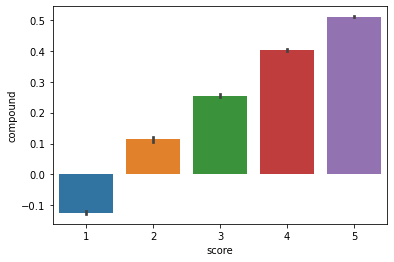

In [48]:
sns.barplot(data=df_sia,x='score',y='compound')
plt.show()

<b> Higher the score higher the compound value  
    Proof 1 : The VADER model is working well

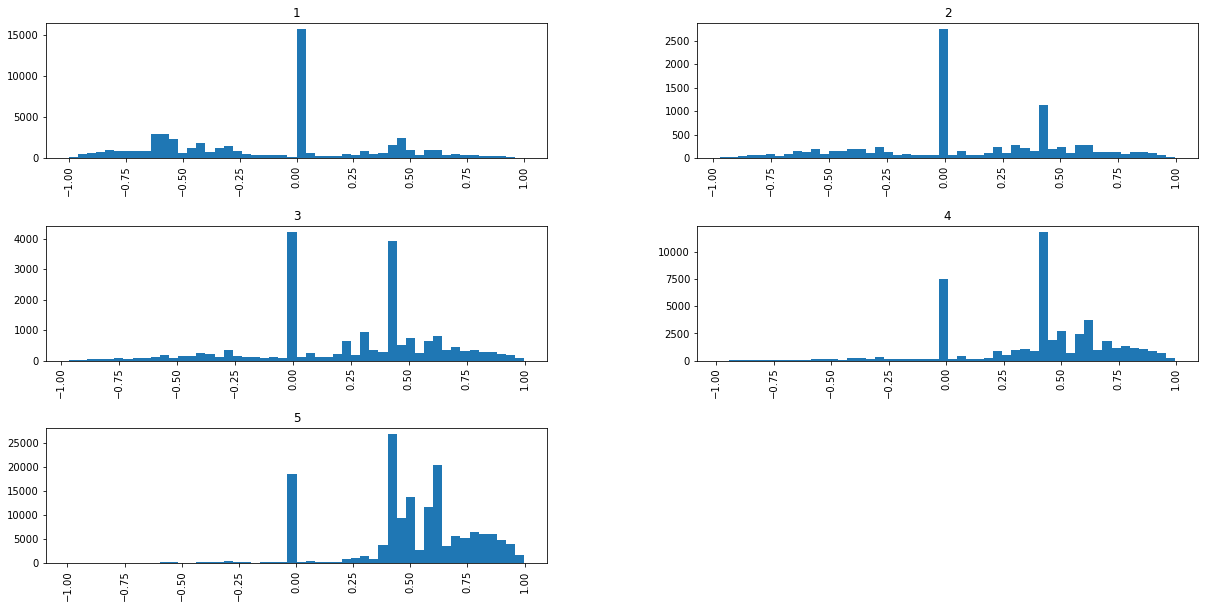

In [49]:
#Seeing frequency distribution of five scores
df_sia.hist(column='compound', by='score', bins = 50, figsize=(20,10))
plt.show()

<b> For higher reviews, compound scores are more saturated on positive side  
    For lower reviews, compound scores are more saturated on negative side  
    There is a significant amount of 0 compound score values in all categories

In [50]:
#Number of neutral reviews
len(df_sia[df_sia['compound']==0])

48004

In [51]:
#Number of positive reviews
len(df_sia[df_sia['compound']>0])

206050

In [52]:
#Number of negative reviews
len(df_sia[df_sia['compound']<0])

35106

In [53]:
df_sia[df_sia['compound']==0]

,id,neg,neu,pos,compound,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review_len,sentiment
21,22,0.0,1.0,0.0,0.0,Sre Hari Thiagarajan,"I bought this app for trial,for 15 days.as I w...",1,911,7.4.0.9502,2020-12-10 08:20:18,We are sorry to hear about your experience. We...,2020-12-11 17:18:14,500,pos
31,32,0.0,1.0,0.0,0.0,A Google user,This app is only for that who understand engli...,1,683,5.1.1.6546,2019-03-16 17:24:54,<NA>,NaT,183,pos
39,40,0.0,1.0,0.0,0.0,A Google user,The teachers are saying very very speed...... ...,1,591,3.8.4.3146,2017-05-02 13:25:53,<NA>,NaT,474,pos
65,66,0.0,1.0,0.0,0.0,A Google user,Its 2016 version and still not updated... fix it,1,430,4.5.0.5048,2018-06-01 13:35:29,Hi! Kindly email us your contact details on ca...,2018-05-07 16:29:48,48,pos
139,140,0.0,1.0,0.0,0.0,A Google user,It doesnt open any thing only opening first on...,1,220,3.4.1.2645,2016-08-17 22:16:44,<NA>,NaT,88,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289154,289155,0.0,1.0,0.0,0.0,Pintu Singh Kuharwal,Bahut achha,5,0,6.1.2.8367,2020-07-17 12:01:36,<NA>,NaT,11,pos
289155,289156,0.0,1.0,0.0,0.0,Yogesh Kumawat,MONIKA kumawat,5,0,6.1.2.8367,2020-07-25 12:46:52,<NA>,NaT,14,pos
289157,289158,0.0,1.0,0.0,0.0,Zahid Pahlavi,Nise app,5,0,6.1.2.8367,2020-07-14 11:52:48,Thank you so much for reviewing our app:). Kee...,2020-07-17 10:56:31,8,pos
289158,289159,0.0,1.0,0.0,0.0,ayush malode,Exce Lent,5,0,6.1.2.8367,2020-07-30 07:46:24,<NA>,NaT,9,pos


### There is a significant number of neutral scores
#### We need to introduce a neutral tag too

In [54]:
sent = []

In [55]:
for row in df_sia['compound'] :
    if row == 0 :
        sent.append('neu')
    elif row > 0 :
        sent.append('pos')
    else :
        sent.append('neg')

In [56]:
sent[:5]

['neg', 'pos', 'neg', 'neg', 'neg']

In [57]:
#New tags added
df_sia['sentiment']= sent

In [58]:
df_sia.groupby('sentiment').count()['id']

sentiment
neg     35106
neu     48004
pos    206050
Name: id, dtype: int64

# EDA with Tags

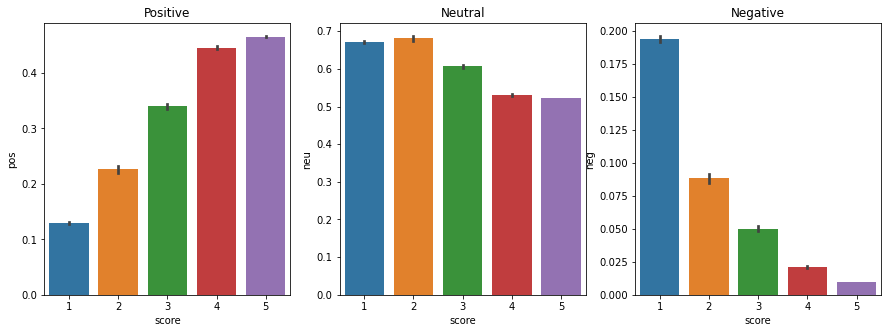

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=df_sia, x='score', y="pos", ax=axs[0])
sns.barplot (data=df_sia, x='score' ,y= "neu", ax=axs[1])
sns. barplot (data=df_sia, x='score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title("Neutral")
axs[2].set_title('Negative')

plt.show()

<b> The above figure shows :  
    1. Most positive tagged reviews are from score 3 to 5  
    2. Most negative tagged reviews are from score 1 or 2  
    3. Neutrally tagges reviews are from all scores but relatively more from lower scores

## Investigating Reviews With Neutral Tag

### Thumbsup Counts

In [60]:
df_sia[(df_sia['compound'] == 0)]['thumbsUpCount'].describe()

count    48004.000000
mean         0.223648
std          7.899140
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        911.000000
Name: thumbsUpCount, dtype: float64

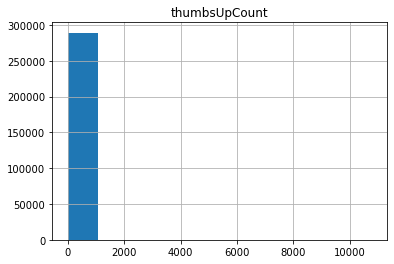

In [61]:
df_sia.hist(column='thumbsUpCount')
plt.show()

<b> Looks like there are way too many 0 entries

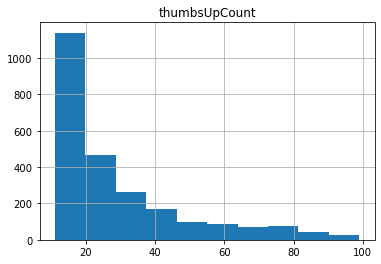

In [62]:
df_sia[(df_sia['thumbsUpCount']>10) & (df_sia['thumbsUpCount']<100)].hist(column='thumbsUpCount')
plt.show()

<b> This shows that thumbsups are very rare on most reviews

### Length

In [63]:
df_sia[df_sia['compound']==0]['review_len'].describe()

count    48004.000000
mean        28.935526
std         37.497987
min          1.000000
25%          8.000000
50%         19.000000
75%         35.000000
max        500.000000
Name: review_len, dtype: float64

<b> The Median review length is 19 characters. Later while filtering we can consider reviews with more than 19 characters

array([[<AxesSubplot:title={'center':'review_len'}>]], dtype=object)

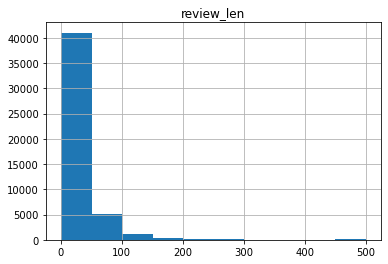

In [64]:
df_sia[df_sia['compound']==0].hist(column = 'review_len')

## Investigating Reviews With Positive Tag

### Thumbsup Counts

In [65]:
df_sia[(df_sia['compound'] > 0)]['thumbsUpCount'].describe()

count    206050.000000
mean          2.232225
std          67.213201
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       10783.000000
Name: thumbsUpCount, dtype: float64

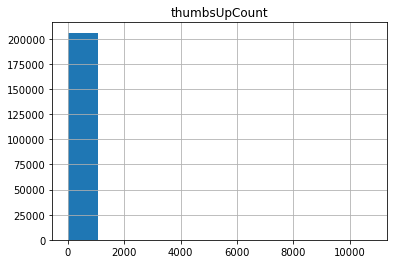

In [66]:
df_sia[(df_sia['compound'] > 0)].hist(column='thumbsUpCount')
plt.show()

<b> Looks like there are way too many 0 entries

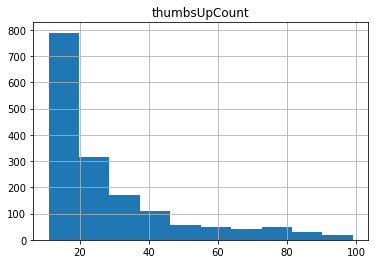

In [67]:
df_sia[(df_sia['compound'] > 0) & (df_sia['thumbsUpCount']>10) & (df_sia['thumbsUpCount']<100)].hist(column='thumbsUpCount')
plt.show()

<b> This shows that thumbsups are very rare on most reviews

### Length

In [68]:
df_sia[df_sia['compound']>0]['review_len'].describe()

count    206050.000000
mean         54.889949
std          75.118820
min           2.000000
25%          13.000000
50%          28.000000
75%          64.000000
max        1946.000000
Name: review_len, dtype: float64

<b> The Median review length is 28 characters. Later while filtering we can consider reviews with more than 28 characters

array([[<AxesSubplot:title={'center':'review_len'}>]], dtype=object)

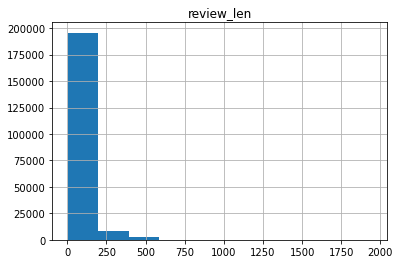

In [69]:
df_sia[df_sia['compound']>0].hist(column = 'review_len')

## Investigating Reviews With Negative Tag

### Thumbsup Counts

In [70]:
df_sia[(df_sia['compound'] < 0)]['thumbsUpCount'].describe()

count    35106.000000
mean         4.474563
std         82.048311
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6934.000000
Name: thumbsUpCount, dtype: float64

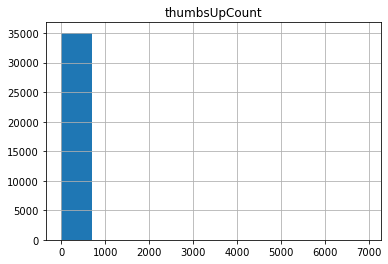

In [71]:
df_sia[(df_sia['compound'] < 0)].hist(column='thumbsUpCount')
plt.show()

<b> Looks like there are way too many 0 entries

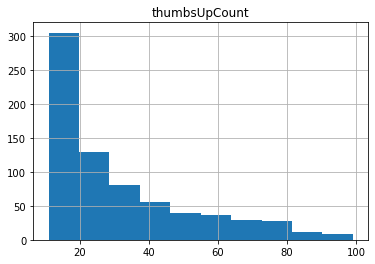

In [72]:
df_sia[(df_sia['compound'] < 0) & \
       (df_sia['thumbsUpCount']>10) \
       & (df_sia['thumbsUpCount']<100)].hist(column='thumbsUpCount')
plt.show()

<b> This shows that thumbsups are very rare on most reviews

### Length

In [73]:
df_sia[df_sia['compound']<0]['review_len'].describe()

count    35106.000000
mean        98.878226
std        112.257058
min          2.000000
25%         21.000000
50%         60.000000
75%        132.000000
max       1715.000000
Name: review_len, dtype: float64

<b> The Median review length is 60 characters. Later while filtering we can consider reviews with more than 60 characters

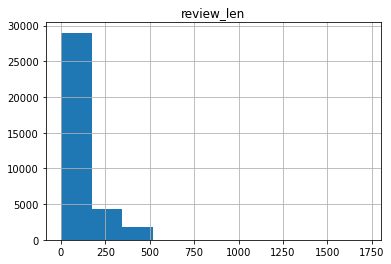

In [74]:
df_sia[df_sia['compound']<0].hist(column = 'review_len')
plt.show()

# Doubts

1. Sample size for Tally Method
2. Criterion for filtering dataset to sample

In [75]:
df_pos = df_sia[df_sia['compound']>0]
df_neg = df_sia[df_sia['compound']<0]
df_neu = df_sia[df_sia['compound']==0]

# Bag Of Words

## Creating a bag of all words from all reviews

In [76]:
bow = []

for i, row in tqdm(df_sia.iterrows(), total=len(df_sia)):
    text = row['content']
    words = word_tokenize(text)
    
    for w in words : 
        bow.append(w.lower())

100%|██████████| 289160/289160 [01:22<00:00, 3487.83it/s]


In [77]:
bow[:9]

['the', 'new', 'update', 'is', 'causing', 'lot', 'of', 'problems', 'in']

In [78]:
len(bow)

3342963

<b> There are total 33 Lack 42 Thousand 963 words retrieved from 2 Lack 89 Thousad 182 Reviews

In [91]:
len(set(bow))

82442

<b> There are total 95 Thousand 635 unique words in 2 Lack 89 Thousad 182 Reviews

## Creating an nltk frequency distribution object

In [92]:
bow_fd = nltk.FreqDist(bow)
type(bow_fd)

nltk.probability.FreqDist

In [93]:
bow_fd.most_common(15)

[('app', 156002),
 ('it', 97762),
 ('is', 93944),
 ('i', 93421),
 ('.', 82897),
 ('very', 81217),
 ('this', 75249),
 ('the', 74427),
 ('and', 68454),
 ('good', 68066),
 ('to', 65287),
 ('for', 64681),
 ('a', 43562),
 ('in', 40618),
 ('nice', 37963)]

### We need to remove stopwords like a, an, the etc. & puctuation

In [94]:
stop_words = stopwords.words('english')
punctuation = list(string.punctuation)

In [95]:
bow_clean = [w for w in bow if w not in stop_words and w not in punctuation]

# Stemming & Lemmatization

In [96]:
len(bow_clean)

1806977

<b> The total number of words dropped from aroud 33 Lack to 18 Lack 6 Thousand 977

In [97]:
len(set(bow_clean))

82268

<b> The total number of unique words dropped from aroud 95 Thousand and 635 to 82 Thousand and 268

## Creating an nltk frequency distribution object for cleaned bow

In [98]:
bow_clean_fd = nltk.FreqDist(bow_clean)

In [99]:
bow_clean_fd

FreqDist({'app': 156002, 'good': 68066, 'nice': 37963, 'learning': 37186, "'s": 35592, 'best': 26851, "n't": 17061, 'like': 15995, 'learn': 14155, 'byjus': 14097, ...})

## Most Occuring Words

In [100]:
bow_most_common = bow_clean_fd.most_common(50)
bow_most_common

[('app', 156002),
 ('good', 68066),
 ('nice', 37963),
 ('learning', 37186),
 ("'s", 35592),
 ('best', 26851),
 ("n't", 17061),
 ('like', 15995),
 ('learn', 14155),
 ('byjus', 14097),
 ('byju', 13289),
 ('...', 12987),
 ('please', 12298),
 ('study', 12286),
 ('love', 11443),
 ('really', 11286),
 ('students', 11189),
 ('..', 10188),
 ('much', 9945),
 ('also', 9895),
 ('helpful', 9108),
 ('understand', 8704),
 ('amazing', 8604),
 ('useful', 8494),
 ('bad', 8417),
 ('great', 8288),
 ('class', 7355),
 ('easy', 7299),
 ('videos', 7294),
 ('one', 7027),
 ('video', 6798),
 ('time', 6577),
 ('super', 6519),
 ('....', 6444),
 ('download', 6313),
 ('worst', 6162),
 ('give', 5996),
 ('awesome', 5930),
 ('help', 5771),
 ('thank', 5707),
 ('us', 5666),
 ('better', 5593),
 ('want', 5576),
 ('aap', 5550),
 ('use', 5496),
 ('excellent', 5349),
 ('u', 5331),
 ('problem', 5244),
 ('way', 5132),
 ('ever', 5099)]

In [101]:
#Finding rows containing words
df_sia[df_sia['content'].str.contains("love" or "it")]

,id,neg,neu,pos,compound,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review_len,sentiment
11,12,0.116,0.798,0.086,-0.5499,HOME LOAN,In some topics it gets lacking it again and ag...,1,1479,7.5.0.9729,2020-12-26 09:59:50,<NA>,NaT,380,neg
22,23,0.205,0.715,0.081,-0.9144,Srajal Singh,Earlier i use to love this app but now what th...,1,867,9.12.0.12860,2022-03-10 23:28:48,We apologise for the inconvenience. We are inv...,2022-03-11 12:05:46,373,neg
28,29,0.081,0.820,0.099,0.4228,Sudeshna Majumder,I loved the app before yesterday. I opened a B...,1,702,8.4.0.11158,2021-05-26 19:49:09,We are extremely sorry that you had an unpleas...,2021-05-27 20:12:35,498,pos
83,84,0.068,0.643,0.289,0.9556,Bollam Navya yadav,The byjus app is so good and it's visuals and ...,1,355,6.3.0.8660,2020-08-01 19:53:33,"""Apologies for the inconvenience. Please drop ...",2020-08-05 15:33:49,348,pos
141,142,0.160,0.637,0.203,0.3646,A Google user,First in beginning I felt that it is a good ap...,1,217,5.7.0.7846,2020-03-10 14:07:02,We would like to hear your feedback to make su...,2020-03-23 19:39:32,350,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287921,287922,0.000,0.192,0.808,0.6369,Domnic Dias,I love it,5,0,6.1.2.8367,2020-07-09 12:44:59,<NA>,NaT,9,pos
287932,287933,0.000,0.196,0.804,0.6240,Shubhada Abhyankar,Most lovely,5,0,6.1.2.8367,2020-07-18 10:29:12,<NA>,NaT,11,pos
288120,288121,0.000,0.192,0.808,0.6369,MAiiB School of English,I love it,5,0,6.1.2.8367,2020-07-04 16:43:08,<NA>,NaT,9,pos
288133,288134,0.000,0.192,0.808,0.6369,Juber Ahmad,I love it,5,0,6.1.2.8367,2020-07-27 20:29:01,"""Thank you so much for reviewing our app:). Ke...",2020-07-28 17:17:56,9,pos


In [102]:
bow_clean_fd.most_common(10)

[('app', 156002),
 ('good', 68066),
 ('nice', 37963),
 ('learning', 37186),
 ("'s", 35592),
 ('best', 26851),
 ("n't", 17061),
 ('like', 15995),
 ('learn', 14155),
 ('byjus', 14097)]

In [ ]:
289000*